In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib

In [4]:
cleanData = pd.read_csv('complete_clean_data.csv')
copyData = cleanData.copy()

In [5]:
searchTable = pd.crosstab(index = copyData['driver_race'], columns = copyData['search_conducted'], margins = True)
searchTable.columns = ['Not Conducted', 'Conducted', 'Total Stops']
searchTable.index = ['Asian', 'Black', 'Hispanic', 'Other', 'White', 'Total Count']
searchTable.rename_axis('Race').rename_axis('Search', axis='columns')
countyTable = pd.crosstab(index = copyData['county_name'], columns = copyData['driver_race'])
countyTable.columns = ['Asian', 'Black', 'Hispanic', 'Other', 'White']
countyTable = countyTable.rename_axis('County Name').rename_axis('Race', axis='columns')
countyTable.drop(countyTable.index[len(countyTable)-1])
np.array_split(countyTable, 2)[1]
arrestTable = pd.crosstab(index = copyData['driver_race'], columns = copyData['stop_outcome'])
arrestTable = arrestTable.rename_axis('Driver Race').rename_axis('Stop Outcome', axis='columns')

In [29]:
timeTable = pd.crosstab(index = copyData['stop_time'], columns = copyData['driver_race'])
timeTable = timeTable.rename_axis('Stop Time').rename_axis('Driver Race', axis='columns')
np.array_split(timeTable, 2)[1]
x_axis = copyData['stop_time'].unique()
timeTableCopy = timeTable.reset_index()


In [ ]:
timeTableCopy = pd.crosstab(index = copyData['stop_time'], columns = copyData['driver_race']).apply(lambda r: r/r.sum(), axis=1)


In [30]:
timeTableCopy

Driver Race,Stop Time,Asian,Black,Hispanic,Other,White
0,00:00,17697,14018,19813,3249,128120
1,01:00,15340,13089,16381,2631,96431
2,02:00,9207,9037,10629,1524,51125
3,03:00,4444,4157,4602,727,24757
4,04:00,2307,2068,2675,384,17756
5,05:00,5019,5481,9509,958,60254
6,06:00,10347,10215,24139,2075,150194
7,07:00,16784,14415,28429,3694,230597
8,08:00,20005,15156,25402,4264,251889
9,09:00,21513,13012,22584,4418,252978


In [31]:
timeTableCopy['Asian'] = timeTableCopy['Asian'] / sum(timeTableCopy['Asian'])
timeTableCopy['Black'] = timeTableCopy['Black'] / sum(timeTableCopy['Black'])
timeTableCopy['Hispanic'] = timeTableCopy['Hispanic'] / sum(timeTableCopy['Hispanic'])
timeTableCopy['Other'] = timeTableCopy['Other'] / sum(timeTableCopy['Other'])
timeTableCopy['White'] = timeTableCopy['White'] / sum(timeTableCopy['White'])

In [39]:
timeTableCopy

Driver Race,Stop Time,Asian,Black,Hispanic,Other,White
0,00:00,0.051980,0.056381,0.042548,0.042115,0.031211
1,01:00,0.045057,0.052645,0.035178,0.034105,0.023491
2,02:00,0.027043,0.036347,0.022825,0.019755,0.012454
3,03:00,0.013053,0.016720,0.009883,0.009424,0.006031
4,04:00,0.006776,0.008318,0.005744,0.004978,0.004325
5,05:00,0.014742,0.022045,0.020420,0.012418,0.014678
6,06:00,0.030391,0.041085,0.051838,0.026897,0.036588
7,07:00,0.049298,0.057978,0.061050,0.047884,0.056175
8,08:00,0.058759,0.060958,0.054550,0.055273,0.061361
9,09:00,0.063188,0.052335,0.048498,0.057269,0.061627


In [52]:
f = lambda x: int(x['Stop Time'].split(':')[0])
timeTableCopy['Stop Time'] = timeTableCopy.apply(f, axis = 1)

In [53]:
timeTableCopy

Driver Race,Stop Time,Asian,Black,Hispanic,Other,White
0,0,0.051980,0.056381,0.042548,0.042115,0.031211
1,1,0.045057,0.052645,0.035178,0.034105,0.023491
2,2,0.027043,0.036347,0.022825,0.019755,0.012454
3,3,0.013053,0.016720,0.009883,0.009424,0.006031
4,4,0.006776,0.008318,0.005744,0.004978,0.004325
5,5,0.014742,0.022045,0.020420,0.012418,0.014678
6,6,0.030391,0.041085,0.051838,0.026897,0.036588
7,7,0.049298,0.057978,0.061050,0.047884,0.056175
8,8,0.058759,0.060958,0.054550,0.055273,0.061361
9,9,0.063188,0.052335,0.048498,0.057269,0.061627


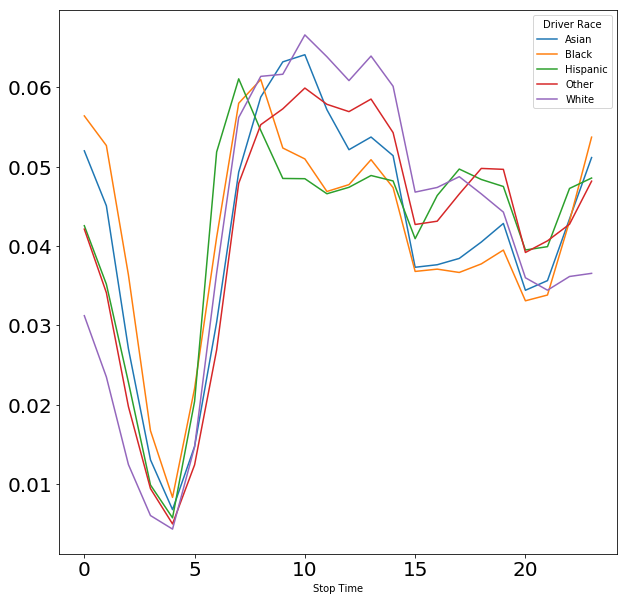

In [59]:
ax = timeTableCopy.plot(x= 'Stop Time', y=['Asian', 'Black', 'Hispanic', 'Other', 'White'], kind = 'line', figsize = (10,10), fontsize = 20)


In [60]:
ax.set_ylabel('Proportion of Drivers Stopped')
ax.set_xlabel('Stop Time (hour of the day)')


Text(0.5,17.2,'Stop Time (hour of the day)')

In [61]:
fig = ax.get_figure()
fig.savefig("output.png")

In [45]:
plt.show()

In [4]:
cleanData = pd.read_csv('complete_clean_data.csv')

In [8]:
copyData = cleanData.copy()

In [62]:
searchTable = pd.crosstab(index = copyData['driver_race'], columns = copyData['search_conducted'], margins = True)

In [65]:
searchTable.columns = ['Not Conducted', 'Conducted', 'Total Stops']
searchTable.index = ['Asian', 'Black', 'Hispanic', 'Other', 'White', 'Total Count']

In [67]:
searchTable.rename_axis('Race').rename_axis('Search', axis='columns')

Search,Not Conducted,Conducted,Total Stops
Race,,,
Asian,333620,6838,340458
Black,235789,12840,248629
Hispanic,446694,18970,465664
Other,72799,4346,77145
White,4007539,97471,4105010
Total Count,5096441,140465,5236906


In [76]:
countyTable = pd.crosstab(index = copyData['county_name'], columns = copyData['driver_race'], margins = True)

In [77]:
countyTable.columns = ['Asian', 'Black', 'Hispanic', 'Other', 'White', 'Total Count']


In [80]:
countyTable = countyTable.rename_axis('County Name').rename_axis('Race', axis='columns')


In [81]:
countyTable.drop(countyTable.index[len(countyTable)-1])

Race,Asian,Black,Hispanic,Other,White,Total Count
County Name,,,,,,
Adams County,2994,3246,9496,892,69625,86253
Asotin County,118,99,284,144,13369,14014
Benton County,3174,3445,35519,720,108768,151626
Chelan County,3160,1047,18760,430,93334,116731
Clallam County,2916,1218,1871,3062,83431,92498
Clark County,11869,9012,15539,1573,203711,241704
Columbia County,93,74,347,90,8746,9350
Cowlitz County,7520,4289,7117,1076,108338,128340
Douglas County,531,289,11195,203,29699,41917


In [88]:
np.array_split(countyTable, 2)[1]

Race,Asian,Black,Hispanic,Other,White,Total Count
County Name,,,,,,
Lewis County,7943,3970,9595,1028,138189,160725
Lincoln County,461,449,1251,552,19862,22575
Mason County,1701,1141,4450,1373,68282,76947
Okanogan County,713,508,9658,3606,45656,60141
Pacific County,1894,620,2300,152,61191,66157
Pend Oreille County,102,73,107,109,7364,7755
Pierce County,36301,54240,34510,6393,391999,523443
Skagit County,15152,3426,13172,1753,120429,153932
Skamania County,234,123,671,123,14679,15830


In [112]:
arrestTable = pd.crosstab(index = copyData['driver_race'], columns = copyData['stop_outcome'])

In [113]:
arrestTable = arrestTable.rename_axis('Driver Race').rename_axis('Stop Outcome', axis='columns')

In [114]:
arrestTable

Stop Outcome,Arrest or Citation,Verbal Warning,Written Warning
Driver Race,,,
Asian,198652,134948,6858
Black,139903,105449,3277
Hispanic,249637,205245,10782
Other,46152,30186,807
White,2076409,1945779,82822
